<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/Intro_to_Pytorch/_03_Fashion_MNIST_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Importing all the packages
import numpy as np
import torch
from torch import nn,optim
import matplotlib.pyplot as plt
from torchvision import datasets,transforms

In [73]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [74]:
# Downloading dataset
# Shuffle them and transform each one of them

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',download=True,train=True,transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',download=True,train=False,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

![Screenshot 2020-07-01 at 16 35 31](https://user-images.githubusercontent.com/26361028/86237159-e2b34f00-bbb8-11ea-9e60-6c92a7b2491a.png)


In [75]:
# Making a mapping for label and description
def what_is_this(x):
  what = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
  return what[x]

what_is_this(3)

'Dress'

torch.Size([64, 1, 28, 28])
Labeled object is :  Shirt


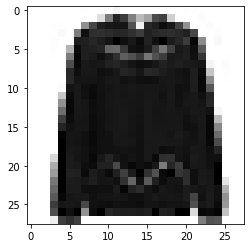

In [86]:
# Let's plot one output
images,labels = next(iter(trainloader))
print (images.shape)

i = 25
plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
#print ("Them labeled item is : ", what_is_this(labels[i]))
x = list(labels.numpy())[i]
print ("Labeled object is : ", what_is_this(x))

In [99]:
# Building the network

input_size = 784
hidden_sizes = [256,128,64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2],output_size),
                      nn.LogSoftmax(dim=1))

print (model)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [87]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.NLLLoss()

epochs = 15
for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print ('Epoch {} - Training Loss: {}'.format(e,running_loss/len(trainloader)))

Epoch 0 - Training Loss: 1.3566355807885433
Epoch 1 - Training Loss: 0.6120463666885392
Epoch 2 - Training Loss: 0.5294754433987746
Epoch 3 - Training Loss: 0.4834233410577022
Epoch 4 - Training Loss: 0.4521421437610441
Epoch 5 - Training Loss: 0.4268081608706954
Epoch 6 - Training Loss: 0.40717102601520544
Epoch 7 - Training Loss: 0.39153063438658015
Epoch 8 - Training Loss: 0.3773364330818658
Epoch 9 - Training Loss: 0.365087588395137
Epoch 10 - Training Loss: 0.3556111622879754
Epoch 11 - Training Loss: 0.3456148462000686
Epoch 12 - Training Loss: 0.33653204980244766
Epoch 13 - Training Loss: 0.32713798495498037
Epoch 14 - Training Loss: 0.3208584764809497


In [88]:
# Testing the model
correct_count, all_count = 0,0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1,784)
    with torch.no_grad():
      logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if true_label == pred_label:
      correct_count += 1
    all_count += 1

print ('Number of images tested: ', all_count)
print ('Model accuracy: ', (correct_count/all_count))


Number of images tested:  10000
Model accuracy:  0.8665


86%..Not that bad

In [106]:
# Let's build once again, this time we will change the learning rate a bit 

model2 = nn.Sequential(nn.Linear(784,256),
                       nn.ReLU(),
                       nn.Linear(256,128),
                       nn.ReLU(),
                       nn.Linear(128,64),
                       nn.ReLU(),
                       nn.Linear(64,10),
                       nn.LogSoftmax(dim=1))

optimizer = optim.SGD(model2.parameters(), lr = 0.03)
criterion = nn.NLLLoss()

In [107]:
epochs = 15
for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    logps = model2(images)
    loss = criterion(logps,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  
  print ('Epoch {} - Training Loss {}: '.format(e,running_loss/len(trainloader)))
  

Epoch 0 - Training Loss 0.8564614081370042: 
Epoch 1 - Training Loss 0.47932088356028235: 
Epoch 2 - Training Loss 0.41926447956610335: 
Epoch 3 - Training Loss 0.3840973034088037: 
Epoch 4 - Training Loss 0.3590042540418314: 
Epoch 5 - Training Loss 0.33761743248017356: 
Epoch 6 - Training Loss 0.32161201929836386: 
Epoch 7 - Training Loss 0.30881492014346856: 
Epoch 8 - Training Loss 0.2967112873520043: 
Epoch 9 - Training Loss 0.2854115111248961: 
Epoch 10 - Training Loss 0.2758173187261324: 
Epoch 11 - Training Loss 0.2670316408866885: 
Epoch 12 - Training Loss 0.2589345124484634: 
Epoch 13 - Training Loss 0.2491871321411021: 
Epoch 14 - Training Loss 0.24338489096524366: 


In [108]:
# Testing the new model

correct_count, all_count = 0,0

for images,labels in testloader:
  for i in range(len(labels)):
    img =  images[i].view(1,784)
    with torch.no_grad():
      logps = model2(img)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if true_label == pred_label:
      correct_count += 1
    all_count += 1

print ('Number of images tested: ', all_count)
print ('Model Accuracy: ', (correct_count/all_count))

Number of images tested:  10000
Model Accuracy:  0.8813
